In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
from sklearn.datasets import make_classification

In [3]:
#data =load_breast_cancer()
w=.97
X, y = make_classification(n_samples=5000,n_classes=2,n_features=15, random_state=123, n_clusters_per_class=1, weights=[w])

In [4]:
np.unique(y, return_counts=True)

(array([0, 1]), array([4830,  170], dtype=int64))

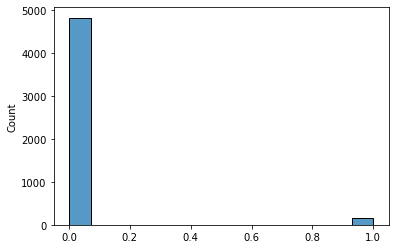

In [5]:
sn.histplot(y);

In [6]:
X

array([[ 3.68758968e-01,  8.31979389e-01,  2.95794368e+00, ...,
         3.99572878e-01, -9.43349828e-02,  2.14006546e+00],
       [ 3.58835414e-01,  2.21275933e-01,  1.12599176e+00, ...,
         2.11614988e-01,  2.05647433e-01, -9.65388689e-01],
       [ 7.24963747e-01,  1.69835687e+00,  3.34058726e+00, ...,
         5.35300786e-01, -1.38568787e+00,  1.51536814e-03],
       ...,
       [ 5.88351609e-01,  7.38235794e-01,  5.47340685e-01, ...,
         2.15621655e-01, -4.62750822e-01, -4.33731457e-01],
       [ 1.17864171e+00, -5.68827571e-01,  7.72607717e-01, ...,
         3.99201941e-01, -1.03765169e+00,  1.48834077e-01],
       [ 7.90840199e-01,  3.94496865e-01, -1.06854332e+00, ...,
         1.07376435e-01,  2.05138298e-01, -9.20201677e-01]])

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
clf = RandomForestClassifier(max_depth=2, random_state=42, class_weight='balanced').fit(X,y)

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [10]:
clf_preds=pd.DataFrame(clf.predict(X))
clf_pred_probs=pd.DataFrame(clf.predict_proba(X)[:,0])
#clf_preds
clf_pred_probs

,0
0,0.770446
1,0.730601
2,0.784039
3,0.569196
4,0.742082
...,...
4995,0.644111
4996,0.793898
4997,0.755176
4998,0.759023


In [11]:
confusion_matrix(y,clf_preds)

array([[4535,  295],
       [  30,  140]], dtype=int64)

In [12]:
accuracy_score(y,clf_preds)

0.935

In [13]:
roc_auc_score(y,clf_preds)

0.8812264036049202

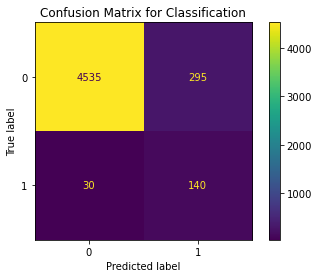

In [14]:
plot_confusion_matrix(clf, X, y) 
plt.title("Confusion Matrix for Classification")
plt.show()  

In [15]:
#######################################################

In [16]:
X_train=pd.DataFrame(data=X)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.368759,0.831979,2.957944,0.065827,-1.199389,-1.003421,-0.536490,-0.372502,0.271788,0.975441,-1.028055,0.282077,0.399573,-0.094335,2.140065
1,0.358835,0.221276,1.125992,1.336419,-1.259625,0.961583,-0.235549,0.608741,0.599941,0.409732,0.454621,0.208703,0.211615,0.205647,-0.965389
2,0.724964,1.698357,3.340587,0.678704,2.159543,0.172991,0.365218,-0.145420,1.400083,0.355824,-0.455725,0.461654,0.535301,-1.385688,0.001515
3,2.185578,-0.900545,-0.594447,1.064210,-1.955223,-0.443737,0.206834,-1.676467,-0.017334,-0.181200,-0.790784,0.991390,0.535258,0.325683,-0.131736
4,0.597800,1.764918,0.213437,-0.216656,0.023257,-0.470709,0.101038,0.137651,1.163634,0.600789,0.433685,0.285281,0.184430,0.918994,-0.879030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.608774,-0.372134,1.498460,-0.617303,0.279070,-0.389081,-0.874020,-0.650686,-0.109238,-0.789400,-0.491450,-0.226107,-0.014305,0.513186,0.669676
4996,2.587678,1.907301,0.058170,-0.266422,0.199267,-0.324975,-1.146819,-0.987303,0.685567,-1.366030,-0.188507,1.202390,0.710789,0.105629,0.262804
4997,0.588352,0.738236,0.547341,-0.933734,1.148492,1.366969,-1.144837,0.931323,-0.646725,-1.462998,-0.083192,0.293434,0.215622,-0.462751,-0.433731
4998,1.178642,-0.568828,0.772608,1.339167,0.734011,0.751652,0.171236,0.727326,0.230868,1.236706,0.506936,0.575676,0.399202,-1.037652,0.148834


In [17]:
#use this if you wantto add the pca feature
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123).fit_transform(X_train)
pca = pd.DataFrame(pca,columns=['pca'])
#pca
#X_train= pd.concat([X_train,pca],axis=1)

In [18]:
#Isolation forest 

In [19]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
ISFOR_clus = IsolationForest(n_estimators=1000,max_samples=1000,bootstrap=True,max_features=5, random_state=rng).fit(X_train)
ISFOR_clus_preds=pd.DataFrame(ISFOR_clus.predict(X_train))
ISFOR_clus_preds=ISFOR_clus_preds.replace(1, 0).replace(-1,1)

In [20]:
#Spectral clustering

In [21]:
from sklearn.cluster import SpectralClustering
rng = np.random.RandomState(42)
SP_clus = SpectralClustering(n_clusters=2, n_init=1000, random_state=rng)
SP_clus_preds=pd.DataFrame(SP_clus.fit_predict(X_train))

In [22]:
#One class Svm

In [23]:
rng = np.random.RandomState(42)
from sklearn.svm import OneClassSVM
SVM_clus = OneClassSVM(gamma='auto').fit(X_train)
#SVM_clus.predict(X_train)

#SVM_clus.score_samples(X_train)
SVM_clus_preds=pd.DataFrame(SVM_clus.fit_predict(X_train))
SVM_clus_preds=SVM_clus_preds.replace(1, 0).replace(-1,1)

In [24]:
#KMeans

In [25]:
from sklearn.cluster import KMeans
KMEANS_clus = KMeans(n_clusters=2, n_init=1000, max_iter=1000,random_state=rng).fit(X_train)
KMEANS_clus.labels_
KMEANS_clus_preds=pd.DataFrame(KMEANS_clus.fit_predict(X_train))
KMEANS_clus_preds

,0
0,1
1,1
2,1
3,0
4,0
...,...
4995,1
4996,0
4997,1
4998,0


In [26]:
#LocalOutlierFactor

In [27]:
from sklearn.neighbors import LocalOutlierFactor
LOCOUT_clus = LocalOutlierFactor(n_neighbors=10).fit(X_train)
LOCOUT_clus_preds=pd.DataFrame(LOCOUT_clus.fit_predict(X_train))
LOCOUT_clus_preds=LOCOUT_clus_preds.replace(1, 0).replace(-1,1)
#LOCOUT_clus_preds.value_counts()

In [28]:
#DBScan

In [29]:
from sklearn.cluster import DBSCAN
DBSC_clus = DBSCAN(eps=3, min_samples=10).fit(X_train)
DBSC_clus_preds=pd.DataFrame(DBSC_clus.fit_predict(X_train))
DBSC_clus_preds=DBSC_clus_preds.replace(1, 0).replace(-1,1)

In [30]:
DBSC_clus_preds.value_counts()

0    4765
1     235
dtype: int64

In [31]:
#clus_preds

In [32]:
finals_preds= pd.concat([clf_preds,clf_pred_probs,ISFOR_clus_preds,SP_clus_preds,SVM_clus_preds,KMEANS_clus_preds,LOCOUT_clus_preds, DBSC_clus_preds],axis=1)
finals_preds.columns=['clf_class','clf_score', 'ISFOR','SP','SVM','KMEANS','LOCOUT','DBSC']
finals_preds

,clf_class,clf_score,ISFOR,SP,SVM,KMEANS,LOCOUT,DBSC
0,0,0.770446,0,0,1,1,0,0
1,0,0.730601,0,0,0,1,0,0
2,0,0.784039,0,0,1,1,0,0
3,0,0.569196,0,0,1,0,0,0
4,0,0.742082,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4995,0,0.644111,0,0,0,1,0,0
4996,0,0.793898,0,0,0,0,0,0
4997,0,0.755176,0,0,0,1,0,0
4998,0,0.759023,0,0,0,0,0,0


In [33]:
finals_preds['ENS']= finals_preds[['ISFOR','SP','SVM','KMEANS','LOCOUT']].mode(axis=1,numeric_only=True)
finals_preds

,clf_class,clf_score,ISFOR,SP,SVM,KMEANS,LOCOUT,DBSC,ENS
0,0,0.770446,0,0,1,1,0,0,0
1,0,0.730601,0,0,0,1,0,0,0
2,0,0.784039,0,0,1,1,0,0,0
3,0,0.569196,0,0,1,0,0,0,0
4,0,0.742082,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4995,0,0.644111,0,0,0,1,0,0,0
4996,0,0.793898,0,0,0,0,0,0,0
4997,0,0.755176,0,0,0,1,0,0,0
4998,0,0.759023,0,0,0,0,0,0,0


In [34]:
finals_preds['clf_class']

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    1
Name: clf_class, Length: 5000, dtype: int32

In [35]:
finals_preds['ENS']

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: ENS, Length: 5000, dtype: int64

In [36]:
confusion_matrix(finals_preds['clf_class'],finals_preds['ENS'])

array([[4539,   26],
       [ 357,   78]], dtype=int64)

In [37]:
def cluster_scores(cls):
    ACC,ROC=[round(accuracy_score(finals_preds['clf_class'],finals_preds[cls]),2) , 
       round(roc_auc_score(finals_preds['clf_class'],finals_preds[cls]),2)]
    return print(cls, 'metrics are:', 'Accuracy=',ACC, 'and', 'ROC=',ROC)

In [38]:
cluster_scores('ENS')

ENS metrics are: Accuracy= 0.92 and ROC= 0.59


In [39]:
cluster_scores('ISFOR')

ISFOR metrics are: Accuracy= 0.91 and ROC= 0.58


In [40]:
cluster_scores('SP')

SP metrics are: Accuracy= 0.91 and ROC= 0.5


In [41]:
cluster_scores('LOCOUT')

LOCOUT metrics are: Accuracy= 0.91 and ROC= 0.5


In [42]:
cluster_scores('DBSC')

DBSC metrics are: Accuracy= 0.89 and ROC= 0.56


In [43]:
cluster_scores('SVM')

SVM metrics are: Accuracy= 0.54 and ROC= 0.63


In [44]:
cluster_scores('KMEANS')

KMEANS metrics are: Accuracy= 0.53 and ROC= 0.6


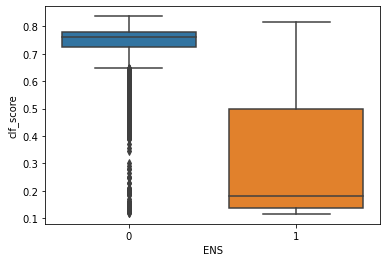

In [45]:
sn.boxplot(x="ENS",y="clf_score",data=finals_preds);

In [46]:
#sn.boxplot(x="clf_class",y="clf_score",data=finals_preds);

In [47]:
#finals_preds.describe()

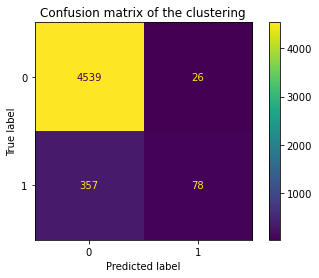

In [48]:
cm = confusion_matrix(finals_preds['clf_class'],finals_preds['ENS'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion matrix of the clustering');